In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)


%matplotlib inline

## Load Data

In [2]:
incident_data = pd.read_csv(
    "../data/clean/incident_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
stop_data = pd.read_csv(
    "../data/clean/stop_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
arrest_data = pd.read_csv(
    "../data/clean/arrest_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
officer_data = pd.read_csv(
    "../data/clean/officers.csv", parse_dates=["year"], low_memory=False
)

In [3]:
# hacking to get things working
incident_data["year"] = incident_data.date.dt.year

In [4]:
incident_data.head().T

,0,1,2,3,4
x,-76.963243,-77.073113,-76.971909,-76.991735,-77.036482
y,38.925035,38.937336,38.84779,38.863048,38.92793
ccn,21029645,21029649,21029667,21029668,21029675
report_dat,2021/03/08 14:06:13+00,2021/03/08 14:27:38+00,2021/03/08 15:54:20+00,2021/03/08 15:46:58+00,2021/03/08 16:13:18+00
shift,DAY,DAY,DAY,DAY,DAY
method,OTHERS,OTHERS,OTHERS,OTHERS,OTHERS
offense,THEFT F/AUTO,BURGLARY,THEFT/OTHER,THEFT F/AUTO,BURGLARY
block,3100 - 3199 BLOCK OF APPLE ROAD NE,3700 - 3799 BLOCK OF PORTER STREET NW,2200 - 2299 BLOCK OF SAVANNAH STREET SE,2300 - 2399 BLOCK OF MARTIN LUTHER KING JR AVE...,3032 - 3099 BLOCK OF 16TH STREET NW
xblock,403187.48,393661.44,402438.66448,400717.53,396836.88
yblock,139684.18,141051.53,131109.085399,132802.55,140005.49


In [5]:
stop_data.head().T

,0,1,2,3,4
person_srch_obj_prob_cause,NaN,NaN,NaN,NaN,NaN
property_search_warrant,0,0,0,0,0
stop_reason_harbor,NaN,NaN,NaN,NaN,NaN
person_search_pat_down,0,0,0,0,1
datetime,2019/07/22 10:14:00+00,2019/07/22 11:27:00+00,2019/07/22 10:50:00+00,2019/07/22 10:39:00+00,2019/07/22 11:57:00+00
stop_duration_mins,1.0,1.0,1.0,1.0,3.0
person_prot_pat_down,0,0,0,0,0
person_srch_obj_seized_con,NaN,NaN,NaN,NaN,NaN
prop_srch_obj_seize_cause,NaN,NaN,NaN,NaN,NaN
property_search_prob_cause,0,0,0,0,0


In [6]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/06/19 04:00:00+00,2013/01/29 05:00:00+00,2013/08/14 04:00:00+00,2013/08/24 04:00:00+00,2013/08/24 04:00:00+00
hour,8,15,17,1,2
ccn,d54cb51c6be54c03b97249526e4bf4c5c0d74597d09ae6...,5cbacdafae96234eeb1582448eebfaac47dd5846cfc0b6...,983c1689b03970a1e2c1a3790eb8a12e9a89c280d6b69a...,d75b27495608cd15930c670036077e79cdcbb442b9ca47...,ef13d64ab39f15ff0c8040ceac8e0e1ca9b32fb60c09df...
arrest_number,f6cef248c21d585b53bb6d843c28738fc9e0b95afb2685...,2f984cf1d572d115670e474970a3d15fe4bc3b09c296b8...,b88953e7d69767c9e04e955ed37d709dfed6aef3f112ea...,db0ce3e84b2bfe82d5d2e299b732657970f3af601525fc...,ceb5301f1c65bf79ab2ac59a85d9a836d32a4f207acd74...
age,34,53,28,43,50
defendant_psa,704,Out of State,105,602,608
defendant_district,7D,Out of State,1D,6D,6D
race,BLACK,BLACK,BLACK,WHITE,BLACK


In [7]:
officer_data

,year,officers
0,1999-01-01,3466
1,2000-01-01,3628
2,2001-01-01,3616
3,2002-01-01,3637
4,2003-01-01,3664
5,2004-01-01,3800
6,2005-01-01,3801
7,2006-01-01,3800
8,2007-01-01,3910
9,2008-01-01,4051


## Data Ranges

In [8]:
[(d.year.min(), d.year.max()) for d in [incident_data, stop_data, arrest_data]]

[(np.float64(1800.0), np.float64(2025.0)),
 (Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')),
 (Timestamp('2013-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))]

In [9]:
[(d.date.min(), d.date.max()) for d in [incident_data, stop_data, arrest_data]]

[(Timestamp('1800-01-15 19:08:58+0000', tz='UTC'),
  Timestamp('2025-03-26 02:25:00+0000', tz='UTC')),
 (Timestamp('2019-07-22 04:00:00+0000', tz='UTC'),
  Timestamp('2024-06-30 03:56:00+0000', tz='UTC')),
 (Timestamp('2013-01-01 05:00:00+0000', tz='UTC'),
  Timestamp('2024-12-31 05:00:00+0000', tz='UTC'))]

## MPD Staffing

[Text(0.5, 1.0, 'MPD Historical Sworn Staffing')]

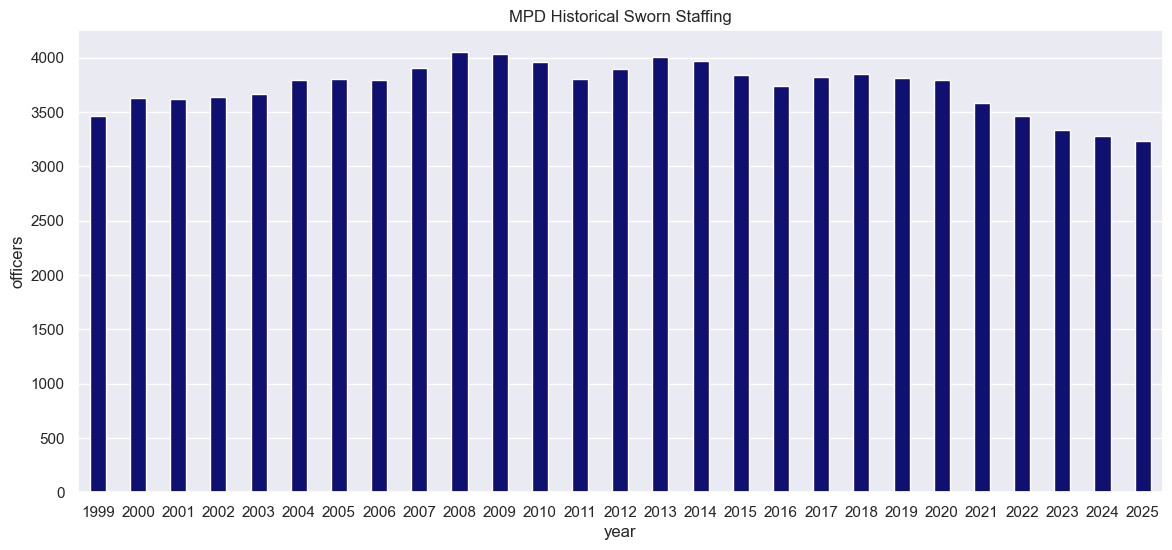

In [10]:
sns.set(rc={"figure.figsize": (14, 6)})
sns.barplot(
    data=officer_data,
    x=officer_data.year.dt.strftime("%Y"),  # hack
    y="officers",
    color="navy",
    width=0.4,
).set(title="MPD Historical Sworn Staffing")

## Scale Incident Data to 2019

In [11]:
incidents_by_month = (
    incident_data.groupby(["month_year", "offense"]).ccn.count().reset_index()
)

In [ ]:
# fix this if older data is added
incidents_by_month = incidents_by_month[(incidents_by_month.month_year > "2015-12")]

# very few arsons, just dropping this
incidents_by_month = incidents_by_month[incidents_by_month.offense != "arson"]

In [13]:
incidents_by_month.columns = ["Date", "Offense", "Count"]

In [14]:
incidents_by_month.tail(20)

,Date,Offense,Count
1268,2025-01-01,ROBBERY,166
1269,2025-01-01,SEX ABUSE,8
1270,2025-01-01,THEFT F/AUTO,473
1271,2025-01-01,THEFT/OTHER,829
1272,2025-02-01,ASSAULT W/DANGEROUS WEAPON,66
1273,2025-02-01,BURGLARY,77
1274,2025-02-01,HOMICIDE,13
1275,2025-02-01,MOTOR VEHICLE THEFT,404
1276,2025-02-01,ROBBERY,106
1277,2025-02-01,SEX ABUSE,5


In [15]:
incidents_2019_monthly_averages = (
    incidents_by_month[
        incidents_by_month.Date.dt.strftime("%Y") == "2019"
    ]  # wrong way to do this
    .groupby("Offense")
    .agg({"Count": "mean"})
    .to_dict()
)[
    "Count"
]  # hack to get rid of nested dict

In [16]:
incidents_by_month["Normalized Count"] = incidents_by_month.apply(
    lambda x: x["Count"] / incidents_2019_monthly_averages[x["Offense"]], axis=1
)

In [17]:
# sanity check
incidents_2019_monthly_averages

{'ARSON': 2.0,
 'ASSAULT W/DANGEROUS WEAPON': 130.91666666666666,
 'BURGLARY': 105.66666666666667,
 'HOMICIDE': 13.666666666666666,
 'MOTOR VEHICLE THEFT': 182.83333333333334,
 'ROBBERY': 186.08333333333334,
 'SEX ABUSE': 16.416666666666668,
 'THEFT F/AUTO': 892.8333333333334,
 'THEFT/OTHER': 1290.6666666666667}

## Incidents by Type

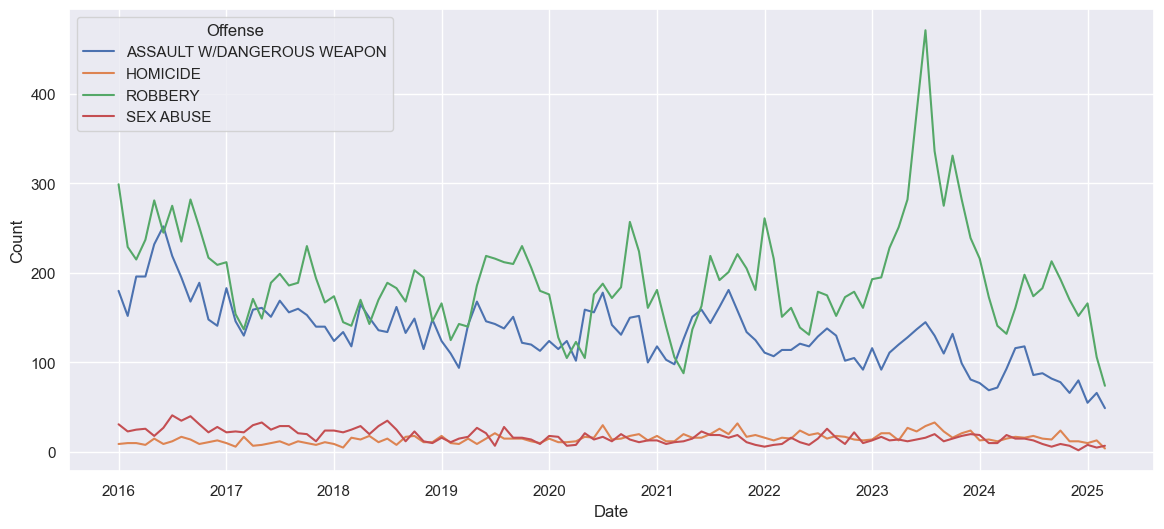

In [18]:
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(
    data=incidents_by_month[
        incidents_by_month.Offense.isin(
            ["ASSAULT W/DANGEROUS WEAPON", "HOMICIDE", "ROBBERY", "SEX ABUSE"]
        )
    ],
    x="Date",
    y="Count",
    hue="Offense",
)

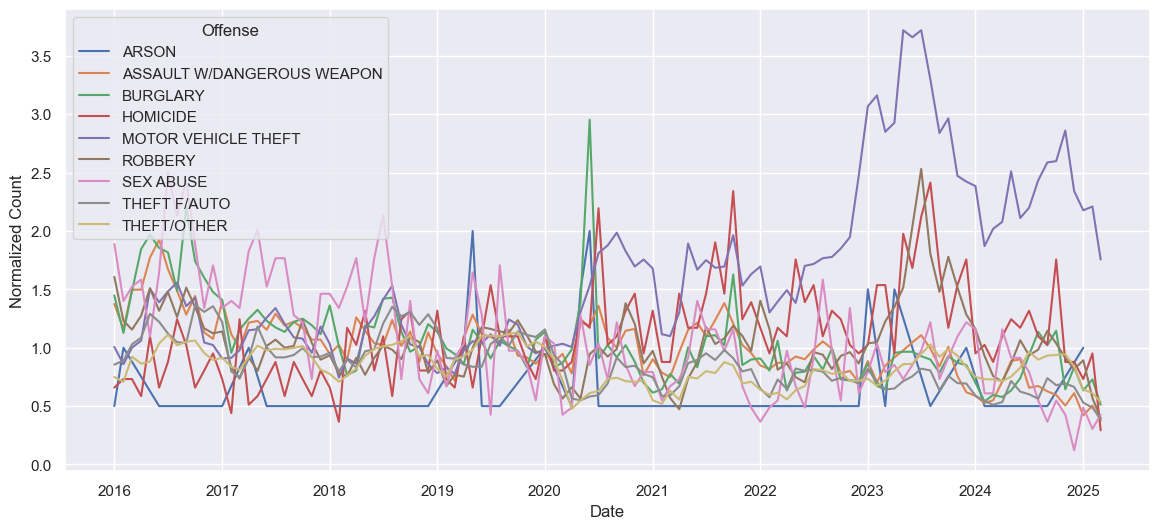

In [19]:
# Too busy and needs the x fixed
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(data=incidents_by_month, x="Date", y="Normalized Count", hue="Offense")

In [20]:
# Break out invariant reporting and other types of crimes
incidents_by_month["Crime Type"] = [
    i if i in ["HOMICIDE", "MOTOR VEHICLE THEFT"] else "Other Crimes"
    for i in incidents_by_month.Offense
]

incidents_by_month = incidents_by_month.sort_values(["Offense", "Date"]).reset_index(
    drop=True
)  # hack for graph ordering

In [21]:
incidents_by_month = incidents_by_month[
    incidents_by_month.Offense != "ARSON"
].reset_index(
    drop=True
)  # too few of these, makes a mess

In [22]:
# This equal weights the crime categories rather than summing counts of all crimes in these categories and normalizing that.
# Could make a good argument for doing it either way but this way is easier for now.
incidents_by_month_rollup = (
    incidents_by_month.groupby(["Date", "Crime Type"])["Normalized Count"]
    .mean()
    .reset_index()
    .sort_values(["Crime Type", "Date"])
    .reset_index(drop=True)
)

In [23]:
incidents_by_month_rollup["Normalized Count 6 Month Rolling Avg"] = (
    incidents_by_month_rollup.groupby("Crime Type")
    .rolling(6, 1)["Normalized Count"]
    .mean()
    .reset_index(drop=True)
)

In [24]:
incidents_by_month["Normalized Count 6 Month Rolling Avg"] = (
    incidents_by_month.groupby("Offense")
    .rolling(6, 1)["Normalized Count"]
    .mean()
    .reset_index(drop=True)
)

[Text(0.5, 1.0, 'Crime Incidents per Month, Homicide and Car Theft vs. Others (normalized to 2019)')]

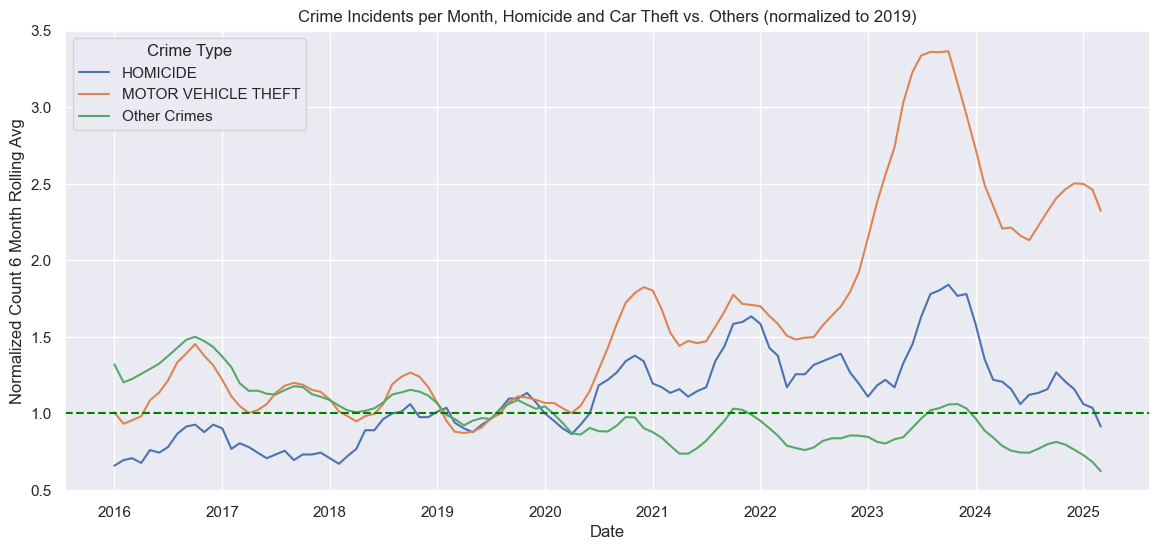

In [25]:
# labels still bad but it makes the point
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(
    data=incidents_by_month_rollup,
    x="Date",
    y="Normalized Count 6 Month Rolling Avg",
    hue="Crime Type",
    errorbar=None,
)
g.axhline(y=1, ls="--", c="green")
g.set(
    title="Crime Incidents per Month, Homicide and Car Theft vs. Others (normalized to 2019)"
)

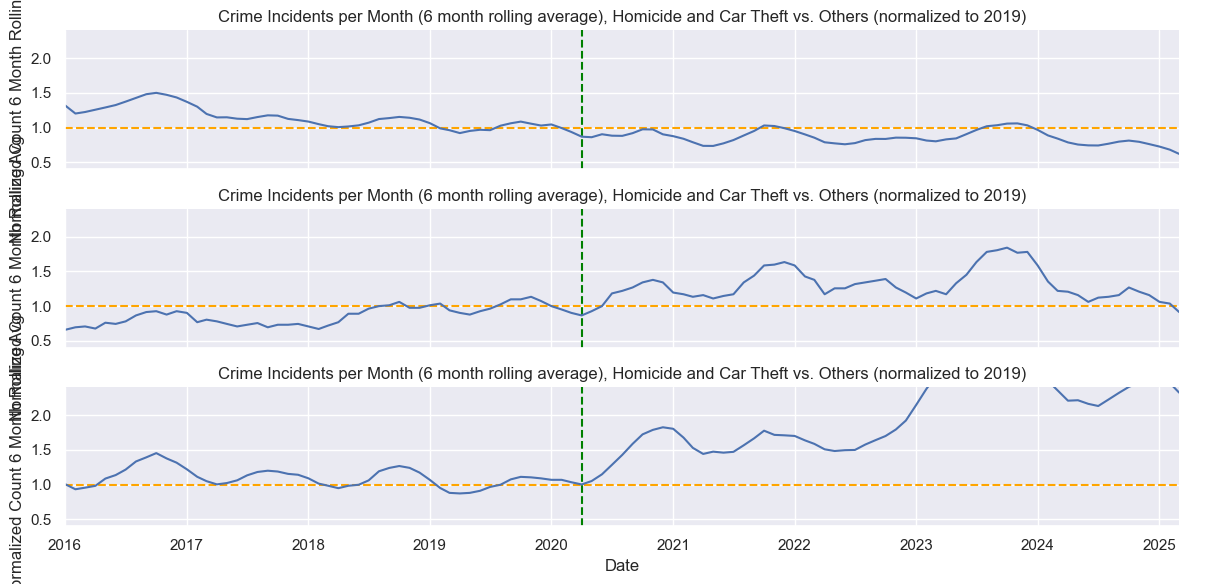

In [26]:
# facet grid instead
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.FacetGrid(data=incidents_by_month, row="Crime Type", height=2, aspect=6)
g.set(
    xlim=(incidents_by_month.Date.min(), incidents_by_month.Date.max())
)  # something is broken, this is a hack
g.set(ylim=(0.4, 2.4))
g.map(plt.axhline, y=1, ls="--", c="orange")
g.map(plt.axvline, x=pd.to_datetime("2020-04-01"), ls="--", c="green")
g.map_dataframe(
    sns.lineplot, x="Date", y="Normalized Count 6 Month Rolling Avg", errorbar=None
)
g.add_legend()
g.set(
    title="Crime Incidents per Month (6 month rolling average), Homicide and Car Theft vs. Others (normalized to 2019)"
)

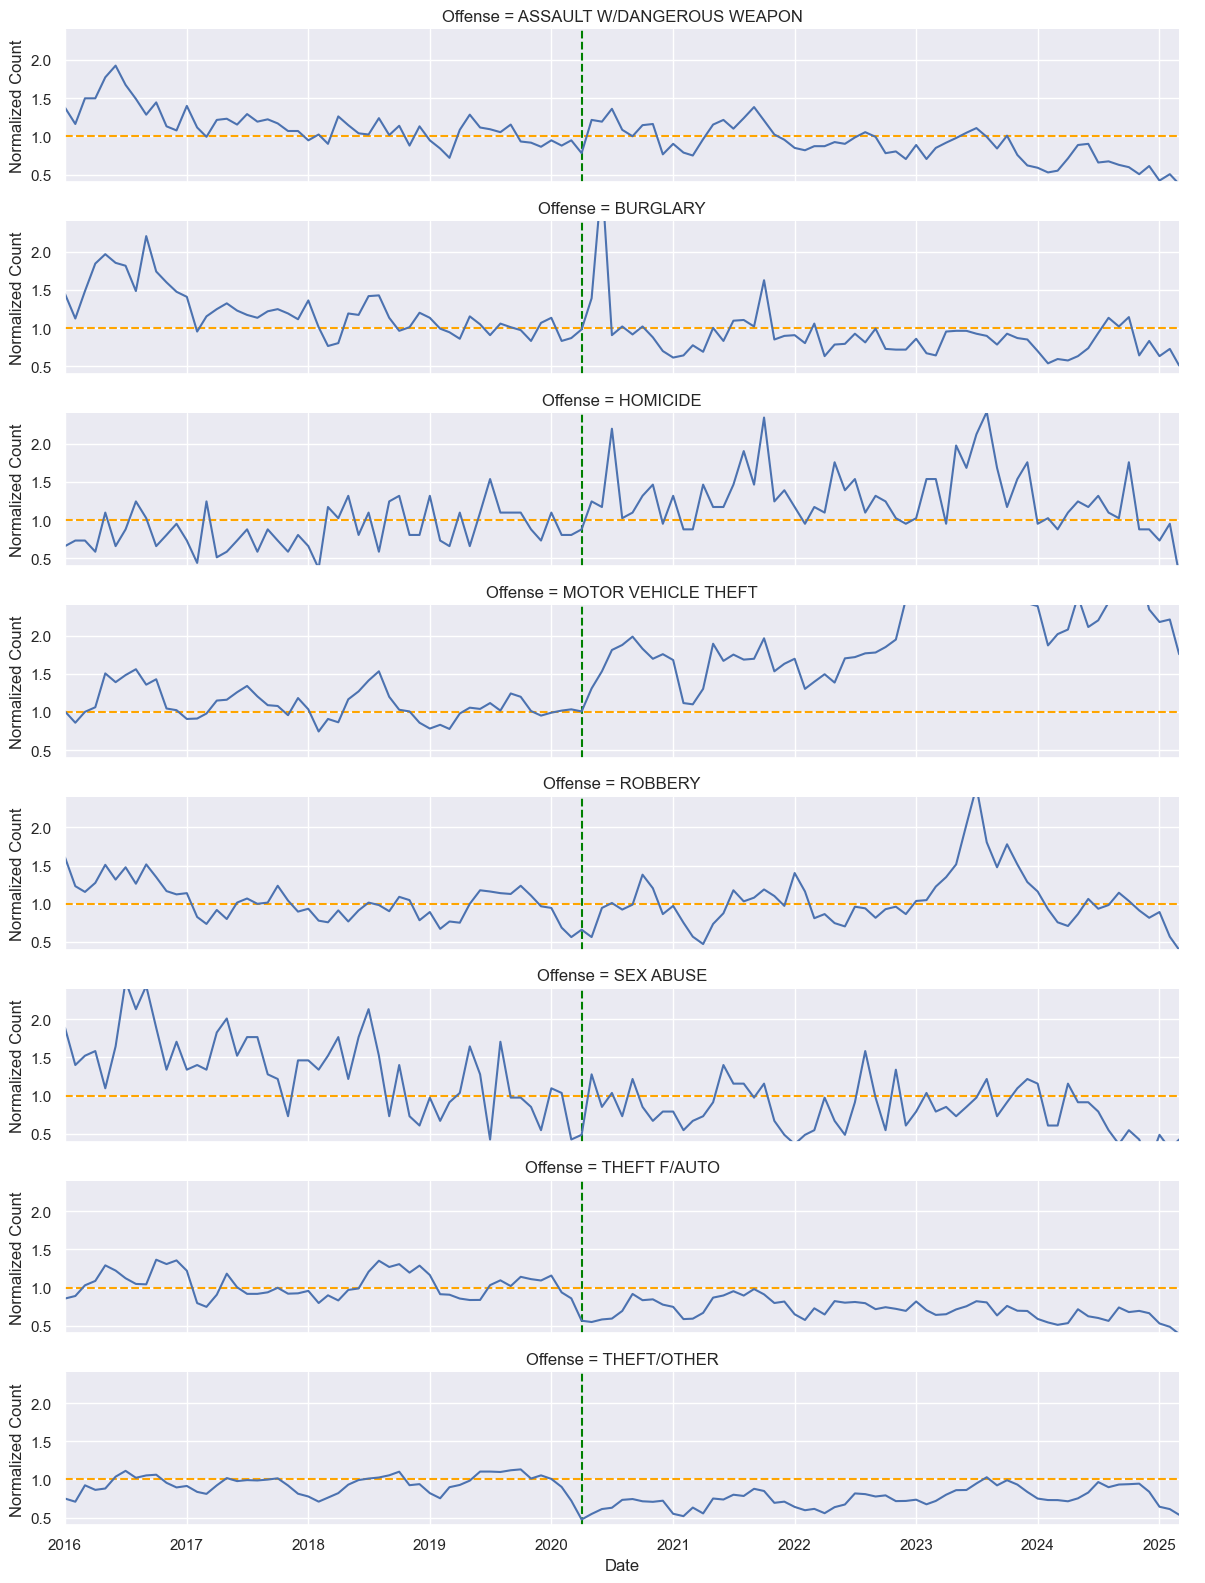

In [27]:
# facet grid of all offense types
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.FacetGrid(data=incidents_by_month, row="Offense", height=2, aspect=6)
g.set(
    xlim=(incidents_by_month.Date.min(), incidents_by_month.Date.max())
)  # something is broken, this is a hack
g.set(ylim=(0.4, 2.4))
g.map(plt.axhline, y=1, ls="--", c="orange")
g.map(plt.axvline, x=pd.to_datetime("2020-04-01"), ls="--", c="green")
g.map_dataframe(sns.lineplot, x="Date", y="Normalized Count")
g.add_legend()

## Stop Data

In [28]:
# This is a mess and needs cleanup
stop_data.stop_reason_nonticket.value_counts()

stop_reason_nonticket
Call for service                                                                                                                            43960
Traffic violation                                                                                                                           11915
Warrant/court order                                                                                                                          8924
BOLO/Lookout                                                                                                                                 6586
Individual<U+0092>s actions                                                                                                                  5633
                                                                                                                                            ...  
Call for service; Information obtained from witnesses or informants; Warrant/court order; BOLO/Lookout

In [29]:
stop_data.stop_reason_ticket.value_counts().head()

stop_reason_ticket
Observed moving violation       2978
Observed equipment violation     626
Response to Crash                324
Calls for service                265
BOLO/Lookout                      40
Name: count, dtype: int64

[Text(0.5, 1.0, 'MPD Stops Recorded as Call for Service per Month'),
 Text(0.5, 0, ''),
 (0.0, 1138.2)]

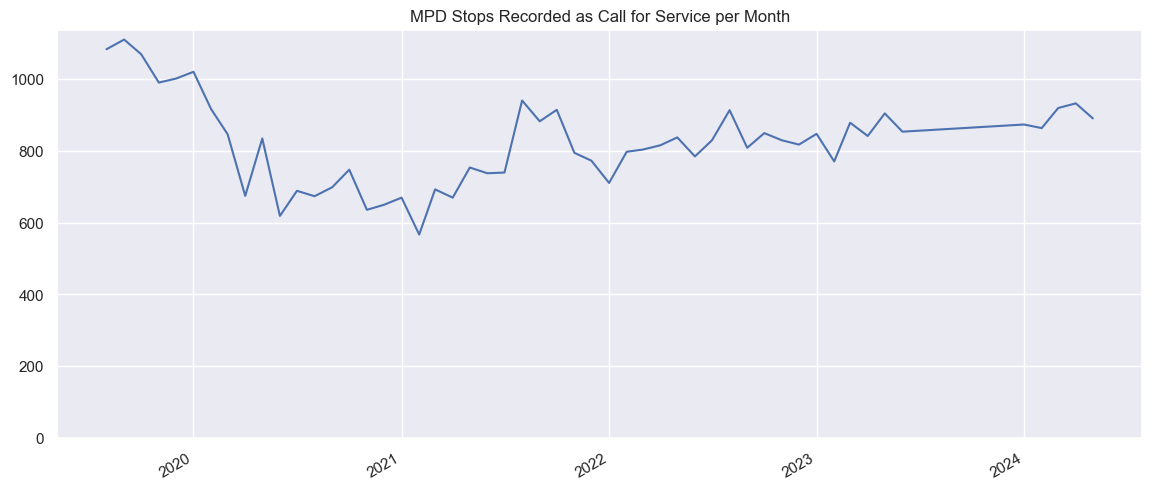

In [30]:
g = (
    stop_data[
        (stop_data.stop_reason_nonticket == "Call for service")
        | (stop_data.stop_reason_ticket == "Calls for service")
    ]
    .groupby("month_year")
    .objectid.count()[1:-1]
    .plot()
)  # [1:-1] to remove incomplete months

g.set(
    title="MPD Stops Recorded as Call for Service per Month",
    xlabel=None,
    ylim=(0, None),
)

[Text(0.5, 1.0, 'MPD Stops per Month'), Text(0.5, 0, ''), (0.0, 4051.3)]

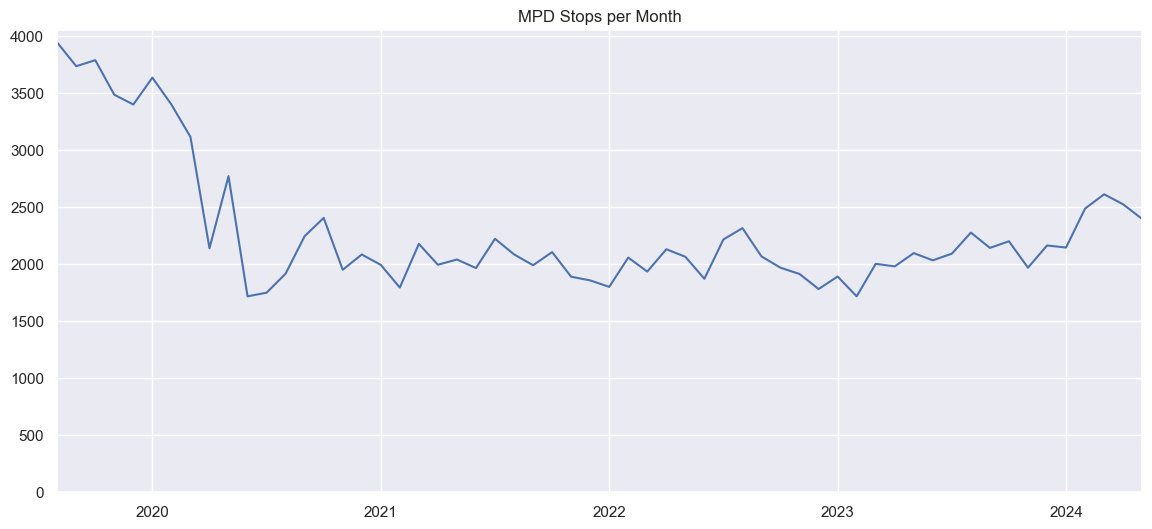

In [31]:
g = (
    stop_data.groupby("month_year").objectid.count()[1:-1].plot()
)  # [1:-1] to remove incomplete months

g.set(title="MPD Stops per Month", xlabel=None, ylim=(0, None))

In [32]:
stop_data.groupby(
    ["month_year", "stop_reason_nonticket"]
).objectid.count().reset_index()[1:-1]

,month_year,stop_reason_nonticket,objectid
1,2019-07-01,BOLO/Lookout; Call for service,18
2,2019-07-01,BOLO/Lookout; Call for service; Individual<U+0...,1
3,2019-07-01,BOLO/Lookout; Call for service; Individual<U+0...,1
4,2019-07-01,BOLO/Lookout; Call for service; Information ob...,2
5,2019-07-01,BOLO/Lookout; Call for service; Prior knowledg...,1
...,...,...,...
9829,2024-06-01,Response to crash,12
9830,2024-06-01,Suspicion of criminal activity (self-initiated),118
9831,2024-06-01,Suspicion of criminal activity (self-initiated...,8
9832,2024-06-01,Traffic violation,326


[Text(0.5, 1.0, 'MPD Observed Equipment Violation Stops per Month'),
 Text(0.5, 0, ''),
 (0.0, 59.8)]

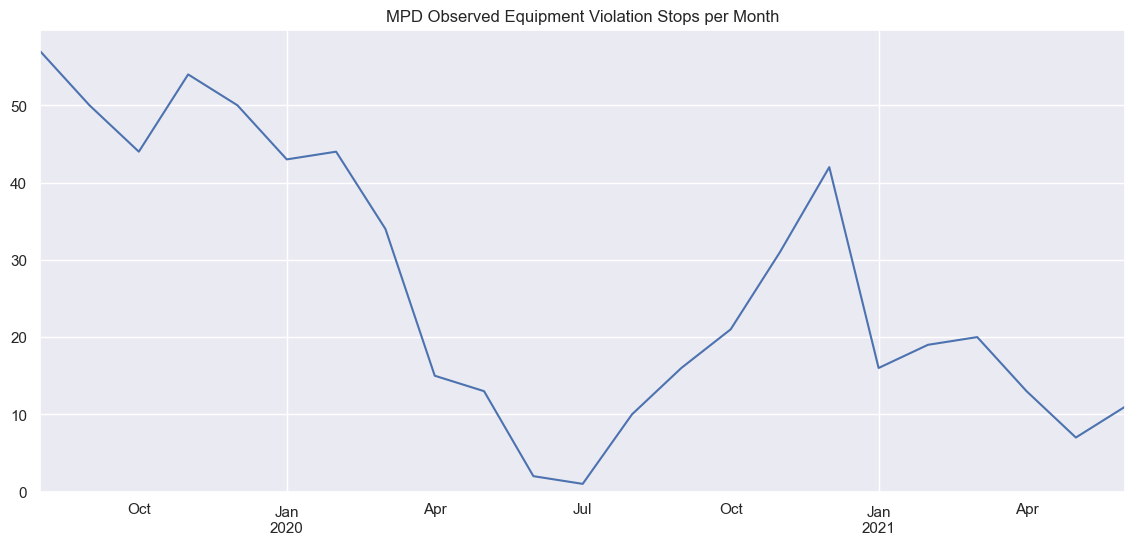

In [33]:
g = (
    stop_data[stop_data.stop_reason_ticket == "Observed equipment violation"]
    .groupby("month_year")
    .objectid.count()[1:]
    .plot()
)  # [1:] to remove an incomplete month
g.set(
    title="MPD Observed Equipment Violation Stops per Month",
    xlabel=None,
    ylim=(0, None),
)

[Text(0.5, 1.0, 'MPD Observed Moving Violation Stops per Month'),
 Text(0.5, 0, ''),
 (0.0, 252.15)]

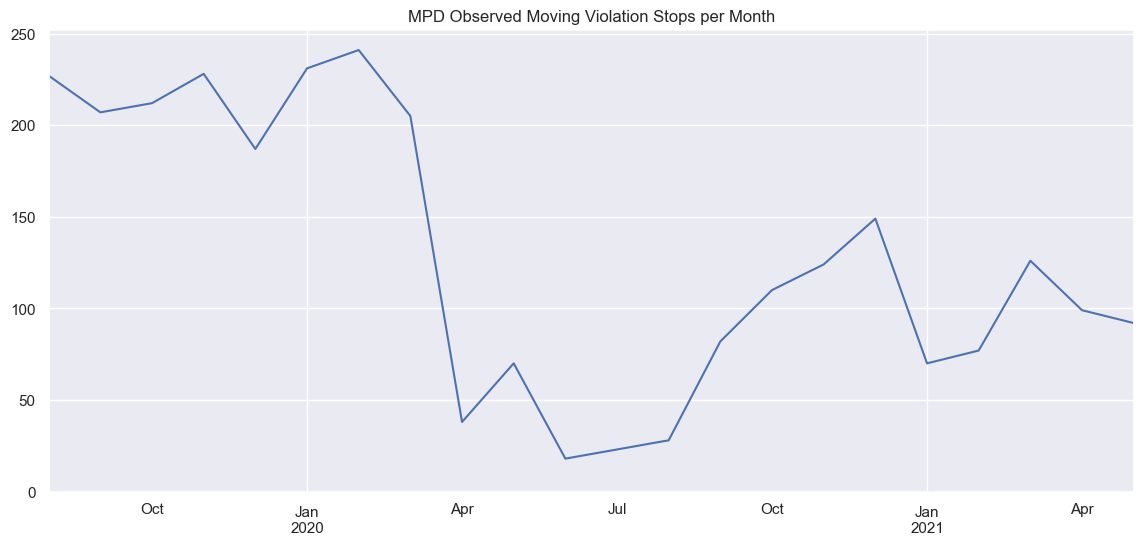

In [34]:
g = (
    stop_data[stop_data.stop_reason_ticket == "Observed moving violation"]
    .groupby("month_year")
    .objectid.count()[1:-1]
    .plot()
)  # [1:-1] to remove incomplete months
g.set(
    title="MPD Observed Moving Violation Stops per Month",
    xlabel=None,
    ylim=(0, None),
)

## Arrest Data

In [35]:
# temporary fix because I don't want to re-run ETL


def arrest_category_cleanup(df: pd.DataFrame) -> pd.DataFrame:
    """
    Data through 2017 has "Na" dropped from the strings in the category field,
    replaced with a single space.
    Like Dave says, if you don't have the right tools, don't use a spoon.
    This also corrects an unrelated errors in the Release Violations and
    Fraud/Financial categories, rolling up a few random values.
    """
    fixes = {
        " rcotics": "Narcotics",
        "Fraud and Fi ncial Crimes": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Coun)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Forg)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Frau)": "Fraud and Financial Crimes",
        "Kid pping": "Kidnapping",
        "Release Violations/Fugitive (Fug)": "Release Violations/Fugitive",
        "Release Violations/Fugitive (Warr)": "Release Violations/Fugitive",
        "Release Violations": "Release Violations/Fugitive",
    }

    df["category"] = df.category.apply(lambda x: fixes.get(x, x))
    return df

In [36]:
arrest_data = arrest_category_cleanup(arrest_data)

[Text(0.5, 1.0, 'MPD Monthly Arrests'), Text(0.5, 0, ''), (0.0, 3293.0)]

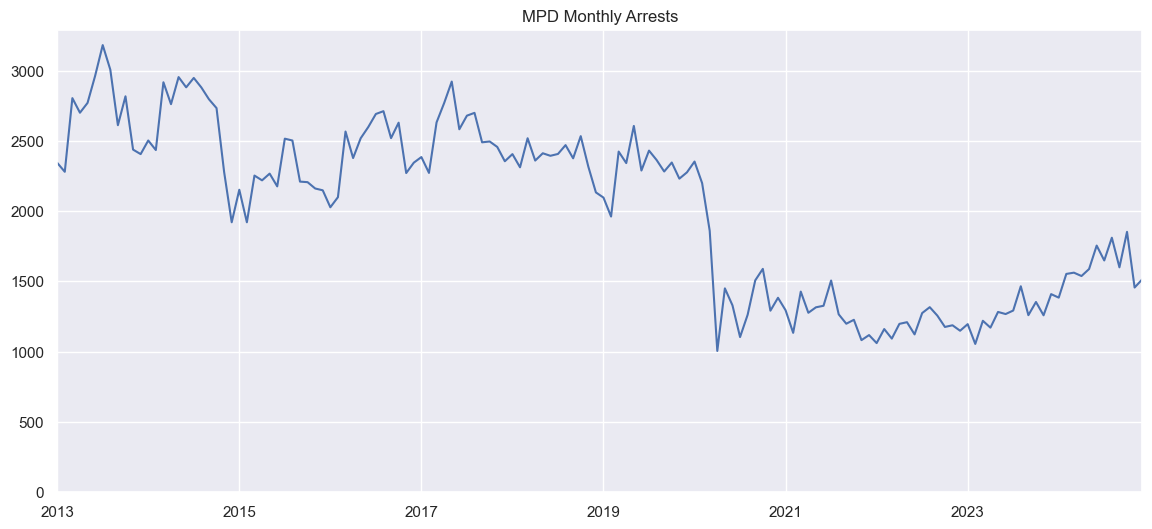

In [37]:
sns.set(rc={"figure.figsize": (14, 6)})
g = arrest_data.groupby("month_year").ccn.count().plot()
g.set(
    title="MPD Monthly Arrests",
    xlabel=None,
    ylim=(0, None),
)

In [38]:
# Quick and dirty monthly dataset
incidents_monthly = incident_data.groupby("month_year").ccn.count()[
    85:-1
]  # manually trim some BS
stops_monthly = stop_data.groupby("month_year").objectid.count()[1:-1]
arrests_monthly = arrest_data.groupby("month_year").ccn.count()

In [39]:
monthly_summary = pd.concat(
    [incidents_monthly, stops_monthly, arrests_monthly], axis=1
).reset_index()
monthly_summary.columns = ["Month", "Incidents", "Stops", "Arrests"]

In [40]:
monthly_summary["Year"] = monthly_summary.Month.dt.year

In [41]:
monthly_summary = monthly_summary[["Year", "Month", "Incidents", "Stops", "Arrests"]]

In [42]:
officers_annual_dict = dict(zip(officer_data.year.dt.year, officer_data.officers))

In [43]:
monthly_summary["Sworn Officers"] = [
    officers_annual_dict[y] for y in monthly_summary.Year
]

In [44]:
monthly_summary["Incidents per Officer per Month"] = (
    monthly_summary.Incidents / monthly_summary["Sworn Officers"]
)
monthly_summary["Stops per Officer per Month"] = (
    monthly_summary.Stops / monthly_summary["Sworn Officers"]
)
monthly_summary["Arrests per Officer per Month"] = (
    monthly_summary.Arrests / monthly_summary["Sworn Officers"]
)

In [45]:
monthly_summary_rates = pd.melt(
    monthly_summary[
        [
            "Month",
            "Incidents per Officer per Month",
            "Stops per Officer per Month",
            "Arrests per Officer per Month",
        ]
    ],
    "Month",
)

<Axes: xlabel='Month', ylabel='value'>

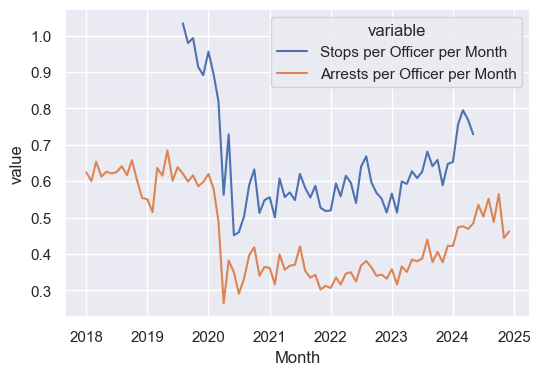

In [46]:
sns.set(rc={"figure.figsize": (6, 4)})

sns.lineplot(
    data=monthly_summary_rates[
        (monthly_summary_rates.Month > "2017-12-01")
        & (monthly_summary_rates.variable != "Incidents per Officer per Month")
    ],
    x="Month",
    y="value",
    hue="variable",
)

In [47]:
arrests_year_category = (
    arrest_data.groupby(["year", "category"]).ccn.count().reset_index()
)
arrests_year_category.pivot(
    columns="year", index="category", values="ccn"
).to_clipboard()
# manual cleanup done here: https://docs.google.com/spreadsheets/d/1N7FVH9PqlW8NjiL6RcXTV7vrrWRhN4aLlYmYrWlEXXM/edit?usp=sharing

In [48]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/06/19 04:00:00+00,2013/01/29 05:00:00+00,2013/08/14 04:00:00+00,2013/08/24 04:00:00+00,2013/08/24 04:00:00+00
hour,8,15,17,1,2
ccn,d54cb51c6be54c03b97249526e4bf4c5c0d74597d09ae6...,5cbacdafae96234eeb1582448eebfaac47dd5846cfc0b6...,983c1689b03970a1e2c1a3790eb8a12e9a89c280d6b69a...,d75b27495608cd15930c670036077e79cdcbb442b9ca47...,ef13d64ab39f15ff0c8040ceac8e0e1ca9b32fb60c09df...
arrest_number,f6cef248c21d585b53bb6d843c28738fc9e0b95afb2685...,2f984cf1d572d115670e474970a3d15fe4bc3b09c296b8...,b88953e7d69767c9e04e955ed37d709dfed6aef3f112ea...,db0ce3e84b2bfe82d5d2e299b732657970f3af601525fc...,ceb5301f1c65bf79ab2ac59a85d9a836d32a4f207acd74...
age,34,53,28,43,50
defendant_psa,704,Out of State,105,602,608
defendant_district,7D,Out of State,1D,6D,6D
race,BLACK,BLACK,BLACK,WHITE,BLACK


In [49]:
arrests_year_district = (
    arrest_data.groupby(["year", "arrest_district"]).ccn.count().reset_index()
)
arrests_year_district.pivot(
    columns="year", index="arrest_district", values="ccn"
).to_clipboard()
# manual cleanup done here: https://docs.google.com/spreadsheets/d/1N7FVH9PqlW8NjiL6RcXTV7vrrWRhN4aLlYmYrWlEXXM/edit?usp=sharing

In [50]:
arrests_year_district_category = (
    arrest_data.groupby(["year", "arrest_district", "category"])
    .ccn.count()
    .reset_index()
)
arrests_year_district_category[
    arrests_year_district_category.year > "2022-01-01"
].pivot(
    index=["category"], columns=["arrest_district", "year"], values="ccn"
).to_clipboard()

In [51]:
officer_data.to_clipboard()

In [52]:
arrests_year_category.pivot(columns="year", index="category", values="ccn")

year,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01,2024-01-01
category,,,,,,,,,,,,
Aggravated Assault,284.0,280.0,230.0,185.0,171.0,128.0,138.0,89.0,96.0,85.0,122.0,236.0
Arson,3.0,6.0,4.0,3.0,4.0,4.0,4.0,5.0,NaN,4.0,6.0,6.0
Assault on a Police Officer,838.0,846.0,735.0,601.0,437.0,403.0,381.0,377.0,336.0,295.0,298.0,320.0
Assault with a Dangerous Weapon,1231.0,1269.0,1123.0,1036.0,848.0,761.0,658.0,571.0,554.0,450.0,398.0,433.0
Burglary,241.0,245.0,194.0,271.0,232.0,180.0,143.0,203.0,128.0,112.0,113.0,148.0
Damage to Property,586.0,669.0,694.0,804.0,803.0,721.0,689.0,661.0,609.0,575.0,627.0,527.0
Disorderly Conduct,876.0,842.0,647.0,622.0,752.0,466.0,352.0,235.0,62.0,106.0,106.0,195.0
Driving/Boating While Intoxicated,1300.0,1330.0,1034.0,1276.0,1297.0,1461.0,1291.0,942.0,788.0,550.0,606.0,604.0
Fraud and Financial Crimes,518.0,219.0,142.0,138.0,137.0,159.0,127.0,49.0,32.0,47.0,25.0,34.0


In [53]:
traffic_arrests = (
    arrest_data[
        arrest_data.category.isin(
            ["Traffic Violations", "Driving/Boating While Intoxicated"]
        )
    ]
    .groupby(["month_year", "category"])
    .ccn.count()
    .reset_index()
)

In [54]:
traffic_arrests.rename(
    columns={"ccn": "Traffic Arrests", "category": "Category"}, inplace=True
)

In [55]:
traffic_arrests["Category"] = traffic_arrests.Category.replace(
    "Driving/Boating While Intoxicated", "DWI"
)

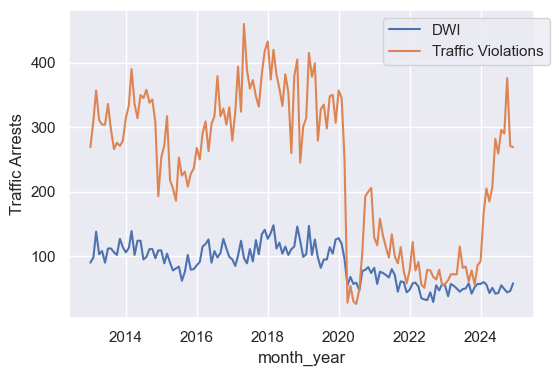

In [56]:
sns.lineplot(traffic_arrests, x="month_year", y="Traffic Arrests", hue="Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper right")

# Display the plot
plt.show()

In [57]:
stop_data.stop_reason_nonticket.value_counts().tail(10)

stop_reason_nonticket
Information obtained from law enforcement sources; Individual<U+0092>s characteristics; Demeanor during a field contact; Call for service    1
Call for service; Individual<U+0092>s actions; Prior knowledge; BOLO/Lookout                                                                 1
Call for service; Response to crash; Suspicion of criminal activity (self-initiated); Individual<U+0092>s actions                            1
Observed a weapon; Call for service; Information obtained from law enforcement sources                                                       1
BOLO/Lookout; Traffic violation; Individual<U+0092>s actions                                                                                 1
Call for service; Information obtained from witnesses or informants; Warrant/court order; BOLO/Lookout                                       1
Observed a weapon; Information obtained from witnesses or informants; Individual<U+0092>s actions; Individual<U+0092>s c

In [58]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/06/19 04:00:00+00,2013/01/29 05:00:00+00,2013/08/14 04:00:00+00,2013/08/24 04:00:00+00,2013/08/24 04:00:00+00
hour,8,15,17,1,2
ccn,d54cb51c6be54c03b97249526e4bf4c5c0d74597d09ae6...,5cbacdafae96234eeb1582448eebfaac47dd5846cfc0b6...,983c1689b03970a1e2c1a3790eb8a12e9a89c280d6b69a...,d75b27495608cd15930c670036077e79cdcbb442b9ca47...,ef13d64ab39f15ff0c8040ceac8e0e1ca9b32fb60c09df...
arrest_number,f6cef248c21d585b53bb6d843c28738fc9e0b95afb2685...,2f984cf1d572d115670e474970a3d15fe4bc3b09c296b8...,b88953e7d69767c9e04e955ed37d709dfed6aef3f112ea...,db0ce3e84b2bfe82d5d2e299b732657970f3af601525fc...,ceb5301f1c65bf79ab2ac59a85d9a836d32a4f207acd74...
age,34,53,28,43,50
defendant_psa,704,Out of State,105,602,608
defendant_district,7D,Out of State,1D,6D,6D
race,BLACK,BLACK,BLACK,WHITE,BLACK


<Axes: xlabel='month_year', ylabel='ccn'>

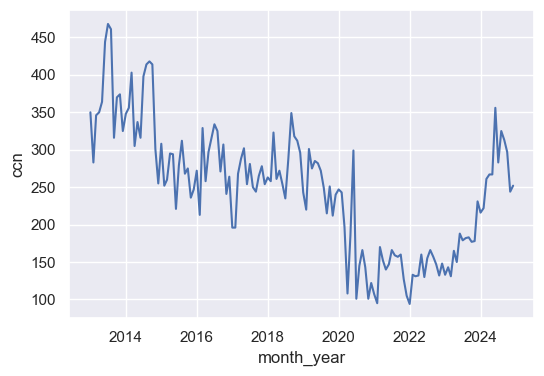

In [59]:
sns.lineplot(
    data=arrest_data[(arrest_data.offense_district == "3D")]
    .groupby(["month_year"])
    .ccn.count()
    .reset_index(),
    x="month_year",
    y="ccn",
)

In [60]:
arrest_data

,type,year,date_,hour,ccn,arrest_number,age,defendant_psa,defendant_district,race,ethnicity,sex,category,description,arrest_psa,arrest_district,arrest_blockx,arrest_blocky,offense_blocky,offense_blockx,offense_psa,offense_district,arrest_latitude,arrest_longitude,offense_latitude,offense_longitude,gis_id,created,edited,globalid,objectid,date,month_year,index_right,WARD,NAME
0,Adult Arrest,2013-01-01,2013/06/19 04:00:00+00,8,d54cb51c6be54c03b97249526e4bf4c5c0d74597d09ae6...,f6cef248c21d585b53bb6d843c28738fc9e0b95afb2685...,34,704,7D,BLACK,NOT HISPANIC,MALE,Release Violations/Fugitive,Fugitive From Justice,704.0,7D,401700.0,130500.0,138800.0,410800.0,NaN,NaN,38.8423,-76.9804,38.9170,-76.8755,ADULT_ARRESTS_13,NaN,2025/03/04 02:03:21+00,{9958EB1B-281C-4C03-A67B-822642F6BB00},13,2013-06-19 04:00:00+00:00,2013-06-01,0.0,8,Ward 8
1,Adult Arrest,2013-01-01,2013/01/29 05:00:00+00,15,5cbacdafae96234eeb1582448eebfaac47dd5846cfc0b6...,2f984cf1d572d115670e474970a3d15fe4bc3b09c296b8...,53,Out of State,Out of State,BLACK,NOT HISPANIC,MALE,Release Violations/Fugitive,Fugitive From Justice,608.0,6D,407800.0,136100.0,136100.0,407800.0,608,6D,38.8927,-76.9101,38.8927,-76.9101,ADULT_ARRESTS_14,NaN,2025/03/04 02:03:21+00,{89009FDA-70C9-43A0-99C8-49228868B55A},14,2013-01-29 05:00:00+00:00,2013-01-01,2.0,7,Ward 7
2,Adult Arrest,2013-01-01,2013/08/14 04:00:00+00,17,983c1689b03970a1e2c1a3790eb8a12e9a89c280d6b69a...,b88953e7d69767c9e04e955ed37d709dfed6aef3f112ea...,28,105,1D,BLACK,NOT HISPANIC,MALE,Prostitution,Solicting Prostitution,608.0,6D,407500.0,136500.0,136500.0,407500.0,608,6D,38.8963,-76.9135,38.8963,-76.9135,ADULT_ARRESTS_16,NaN,2025/03/04 02:03:21+00,{105DFF39-A734-432A-B6B1-B25CA1D69D27},16,2013-08-14 04:00:00+00:00,2013-08-01,2.0,7,Ward 7
3,Adult Arrest,2013-01-01,2013/08/24 04:00:00+00,1,d75b27495608cd15930c670036077e79cdcbb442b9ca47...,db0ce3e84b2bfe82d5d2e299b732657970f3af601525fc...,43,602,6D,WHITE,NaN,FEMALE,Prostitution,Solicting Prostitution,608.0,6D,407500.0,136100.0,136500.0,407500.0,608,6D,38.8927,-76.9135,38.8963,-76.9135,ADULT_ARRESTS_17,NaN,2025/03/04 02:03:21+00,{80FDB3EA-35E7-4A3B-BC43-4A27F234F2A5},17,2013-08-24 04:00:00+00:00,2013-08-01,2.0,7,Ward 7
4,Adult Arrest,2013-01-01,2013/08/24 04:00:00+00,2,ef13d64ab39f15ff0c8040ceac8e0e1ca9b32fb60c09df...,ceb5301f1c65bf79ab2ac59a85d9a836d32a4f207acd74...,50,608,6D,BLACK,NOT HISPANIC,FEMALE,Prostitution,Solicting Prostitution,608.0,6D,407500.0,136500.0,136500.0,407500.0,608,6D,38.8963,-76.9135,38.8963,-76.9135,ADULT_ARRESTS_18,NaN,2025/03/04 02:03:21+00,{0C111A72-A437-479B-8DED-A38D22596F10},18,2013-08-24 04:00:00+00:00,2013-08-01,2.0,7,Ward 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289761,Adult,2024-01-01,2024/12/31 05:00:00+00,0,8443a01513665a7d137d4fe5093517ce358f9c6e,f71cd1d2709147e6d5924436dec7ccc3b0752705,22,409,4D,WHITE,HISPANIC,FEMALE,Simple Assault,Simple Assault,308.0,3D,399200.0,137800.0,137800.0,399200.0,308,3D,38.9080,-77.0100,38.9080,-77.0100,ADULT_ARRESTS_297181,2025/03/03 22:19:20+00,2025/03/04 02:03:21+00,{7E2EBF31-BA89-4EAE-8B97-EC0CC1FD2311},297181,2024-12-31 05:00:00+00:00,2024-12-01,5.0,5,Ward 5
289762,Adult,2024-01-01,2024/12/31 05:00:00+00,19,6e841ca12f1ad2a2b3a96367ba8bd638e99d2b80,2fd70f06106ce628fc41efa0857054c207f2e835,21,608,6D,BLACK,UNKNOWN,FEMALE,Simple Assault,Simple Assault,608.0,6D,407300.0,136600.0,136600.0,407300.0,608,6D,38.8970,-76.9150,38.8970,-76.9150,ADULT_ARRESTS_297182,2025/03/03 22:19:20+00,2025/03/04 02:03:21+00,{52557B0D-A8B1-4342-9780-DD744CA20D95},297182,2024-12-31 05:00:00+00:00,2024-12-01,2.0,7,Ward 7
289763,Adult,2024-01-01,2024/12/31 05:00:00+00,6,ef6db8209505f4b7c3707f1ac23cf24d034f05d9,20e5e0a9fba65c02a0eac9390f461610b1a3b4d2,19,601,6D,BLACK,NOT HISPANIC,MALE,Sex Abuse,Second Degree Sex Abuse- Incompetent,608.0,6D,406100.0,136900.0,136600.0,399100.0,102,1D,38.9000,-76.9300,38.8980,-77.0110,ADULT_ARRESTS_297183,2025/03/03 2

In [61]:
arrest_data[
    (arrest_data.offense_district == "3D")
    & arrest_data["year"].isin(["2019-01-01", "2023-01-01"])
].groupby(["year", "category"]).ccn.count().reset_index().to_clipboard()

In [62]:
arrest_data.defendant_district.value_counts()

defendant_district
7D              53393
6D              49236
Out of State    39022
5D              32366
4D              25792
1D              19269
3D              16665
2D               5403
UNK              2398
Name: count, dtype: int64

In [63]:
arrest_data["defendant_out_of_state"] = (
    arrest_data.defendant_district == "Out of State"
) | (arrest_data.defendant_district.isna())

In [64]:
arrest_data[(arrest_data.offense_district == "3D")].groupby(
    ["year", "defendant_out_of_state"]
).ccn.count()

year        defendant_out_of_state
2013-01-01  False                     3132
            True                      1319
2014-01-01  False                     2929
            True                      1336
2015-01-01  False                     2132
            True                      1115
2016-01-01  False                     2170
            True                      1257
2017-01-01  False                     1899
            True                      1177
2018-01-01  False                     2000
            True                      1429
2019-01-01  False                     1757
            True                      1288
2020-01-01  False                     1232
            True                       825
2021-01-01  False                     1016
            True                       669
2022-01-01  False                      952
            True                       733
2023-01-01  False                     1184
            True                       856
2024-01-01  False  

## Juvenile Arrests

In [65]:
juvenile_arrests = pd.read_csv("../data/raw/Juvenile_Arrests.csv")

In [66]:
juvenile_arrests.columns = [c.lower() for c in juvenile_arrests.columns]

In [67]:
juvenile_arrests["year"] = [d[:4] for d in juvenile_arrests.arrest_date.values]
juvenile_arrests["month_year"] = [
    d[:7].replace("/", "-") for d in juvenile_arrests.arrest_date.values
]

In [68]:
juvenile_arrests.month_year.value_counts().sort_index()

month_year
2011-01    271
2011-02    261
2011-03    341
2011-04    300
2011-05    305
2011-06    281
2011-07    255
2011-08    304
2011-09    334
2011-10    264
2011-11    304
2011-12    279
2012-01    271
2012-02    253
2012-03    265
2012-04    243
2012-05    313
2012-06    256
2012-07    235
2012-08    248
2012-09    207
2012-10    237
2012-11    236
2012-12    258
2013-01    250
2013-02    241
2013-03    307
2013-04    285
2013-05    293
2013-06    266
2013-07    251
2013-08    241
2013-09    283
2013-10    283
2013-11    248
2013-12    225
2014-01    243
2014-02    226
2014-03    262
2014-04    244
2014-05    270
2014-06    259
2014-07    268
2014-08    222
2014-09    238
2014-10    276
2014-11    237
2014-12    237
2015-01    240
2015-02    220
2015-03    256
2015-04    252
2015-05    290
2015-06    268
2015-07    269
2015-08    273
2015-09    286
2015-10    277
2015-11    224
2015-12    286
2016-01    262
2016-02    298
2016-03    269
2016-04    323
2016-05    299
2016-06    247

In [69]:
msr = monthly_summary_rates[
    (monthly_summary_rates.Month > "2017-12-01")
    & (monthly_summary_rates.variable != "Incidents per Officer per Month")
]

In [70]:
msr.to_clipboard()

In [71]:
incident_data[incident_data.year > "2023-12-31"].month_year.value_counts()

TypeError: Invalid comparison between dtype=float64 and str

In [72]:
stop_data.stop_reason_nonticket.value_counts()

stop_reason_nonticket
Call for service                                                                                                                            43960
Traffic violation                                                                                                                           11915
Warrant/court order                                                                                                                          8924
BOLO/Lookout                                                                                                                                 6586
Individual<U+0092>s actions                                                                                                                  5633
                                                                                                                                            ...  
Call for service; Information obtained from witnesses or informants; Warrant/court order; BOLO/Lookout

In [73]:
12816 / 17030

0.7525543159130945

In [74]:
arrest_data[
    (arrest_data.date_ >= "2023-01-01") & (arrest_data.date_ <= "2023-10-31")
].shape

(12816, 36)

In [75]:
[i for i in arrest_data.description.unique()]

['Second Degree Sex Abuse- Incompetent',
 'Murder I',
 'Solicting Prostitution',
 'Ucsa Pwid Heroin',
 'No Permit',
 'Dui - Refusing Test',
 'Pandering A Minor',
 'Apo (misd)',
 'Driving Under Influence-1st Off',
 'Fugitive From Justice',
 'Ucsa Possession Marijua ',
 'Reckless Driving',
 'Simple Assault',
 'Failure To Appear (OAG)',
 'Operating After Revocation',
 'Ucsa Poss Marijua ',
 'Burglary Two',
 'Soliciting, Lewd & Immoral Purpose',
 'Ucsa Pwid Other',
 'Assault W/i To Kill',
 'Parole Violation',
 'Possession Of An Open Container Of Alcohol',
 'Ucsa Pwid Marijua ',
 'Ucsa Pwid Cocaine/crack Cocaine',
 'Driving While Intoxicated - 1st Off',
 'Possession Of Drug Parapher lia (syringes)',
 'Threats To Do Bodily Harm - Misd',
 'Operating After Suspension',
 'Adw Gun',
 'Theft Second Degree',
 'Assault With Significant Bodily Injury',
 'Assault On A Police Officer [misd]',
 'Ucsa Possession Drug Paraper lia',
 'Probation Violation',
 'Sexual Abuse Of A Child, 1st Degree (statutory)